<a href="https://colab.research.google.com/github/bhowad-akash/Machine-Learning/blob/main/Data_Preprocessing_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Importing Libraries*

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# *Get Data*

In [5]:
titanic_dataset = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_train.csv')

# *Data Inspection*

In [6]:
titanic_dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_dataset.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
titanic_dataset.shape

(891, 12)

In [9]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#Removing Features that aren't relevant to Modelling

titanic_dataset = titanic_dataset.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

In [13]:
titanic_dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# *Data Preprocessing*

In [14]:
#Dealing with Missing Values

titanic_dataset.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

***Options to deal with missing values:***

1. Get rid of the corresponding instances.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).
4. Use imputation methods.

In [15]:
#Option 1: Get rid of the corresponding instances containing missing values

titanic_dataset_no_missing_val = titanic_dataset.dropna(subset=['Age', 'Cabin', 'Embarked'], axis = 0)

In [16]:
titanic_dataset_no_missing_val.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [17]:
#Option 2: Get rid of the whole attribute

'''As seen above, the feature Cabin contains 687 missing values which is a significant portion of the total instances (891).
If we remove those instances based on the Cabin feature (and Age and Embarked),
we only get 183 instances left from the original 891 instances, which means we lost the majority portion of the original dataset.
So we'd better drop the feature of Cabin entirely.'''

titanic_dataset_new = titanic_dataset.drop("Cabin", axis = 1)

In [18]:
titanic_dataset_new.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
#Option 3: Set the missing values to some value

'''After removing the entire feature of Cabin, the resulting dataset titanic1 still contains missing values for Age and Embarked.
We may fill the missing values by statistics, e.g., mean and median of a numeric feature or the most frequent value of a categorical feature, etc.'''

median_age = titanic_dataset_new['Age'].median()
titanic_dataset_new['Age'].fillna(median_age, inplace= True)
titanic_dataset_new.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
#Option 4: Use Imputation Methods

'''sci-kit learn provide many imputation methods.
Here we replace missing values of Embarked using its mode, i.e., its most frequent value'''

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

imputer.fit(titanic_dataset_new)
embarked_imputer = imputer.transform(titanic_dataset_new)

pd.DataFrame(embarked_imputer).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

# *Data Exploration*

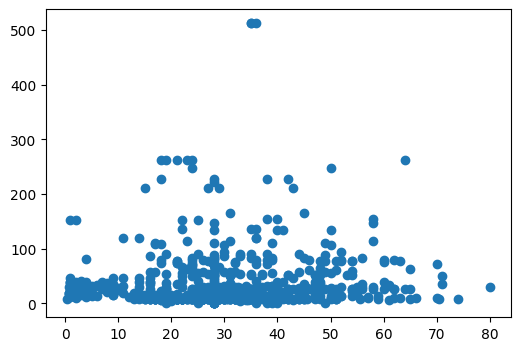

In [21]:
#Scatter Plot
plt.figure(figsize=(6,4))
plt.scatter(titanic_dataset_new['Age'], titanic_dataset_new['Fare'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee44085ca60>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee44085cfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee44085c8e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ee44085d4e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ee44085d780>,
 'means': []}

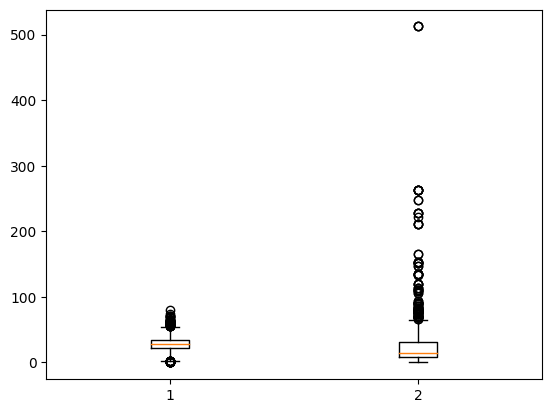

In [22]:
#Box Plot
'''Demonstrating boxplot for 'Age', 'Fare'.
Boxplot can visualise the distribution of a feature for outlies removal if needed.'''

plt.boxplot(titanic_dataset_new[['Age', 'Fare']])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

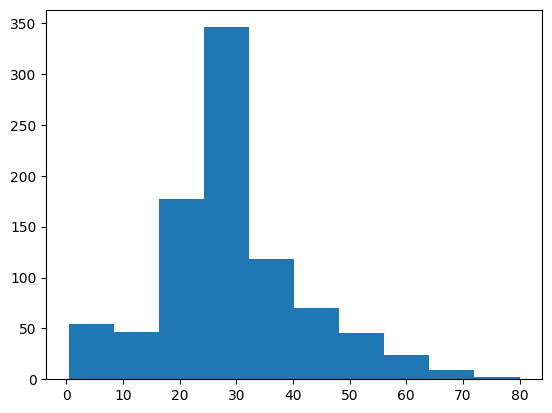

In [23]:
#Histogram
'''We use the histogram to see what a feature distribution looks like.'''

plt.hist(titanic_dataset_new['Age'])

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='SibSp'>,
        <Axes: xlabel='SibSp', ylabel='SibSp'>,
        <Axes: xlabel='Parch', ylabel='SibSp'>,
        <Axes: xlabel='Fare', ylabel='SibSp'>],
       [<Axes: xlabel='Age', ylabel='Parch'>,
        <Axes: xlabel='SibSp', ylabel='Parch'>,
        <Axes: xlabel='Parch', ylabel='Parch'>,
        <Axes: xlabel='Fare', ylabel='Parch'>],
       [<Axes: xlabel='Age', ylabel='Fare'>,
        <Axes: xlabel='SibSp', ylabel='Fare'>,
        <Axes: xlabel='Parch', ylabel='Fare'>,
        <Axes: xlabel='Fare', ylabel='Fare'>]], dtype=object)

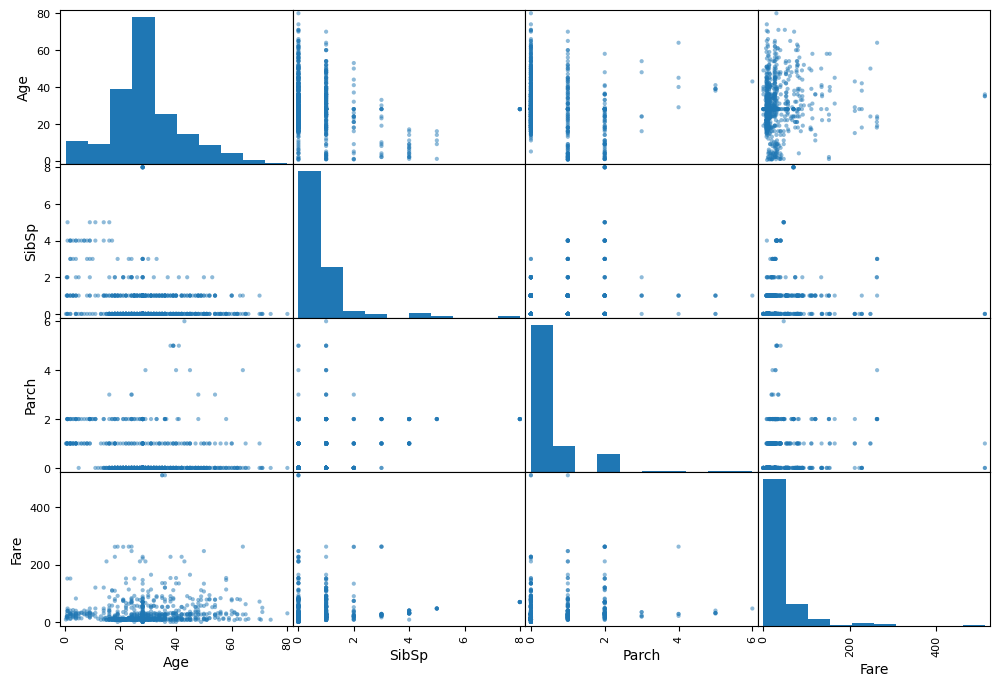

In [24]:
#Scatter plot Matrix

from pandas.plotting import scatter_matrix
scatter_matrix(titanic_dataset_new[['Age', 'SibSp', 'Parch', 'Fare']], figsize = (12,8))

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500
Age      -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688
SibSp    -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000


<Axes: >

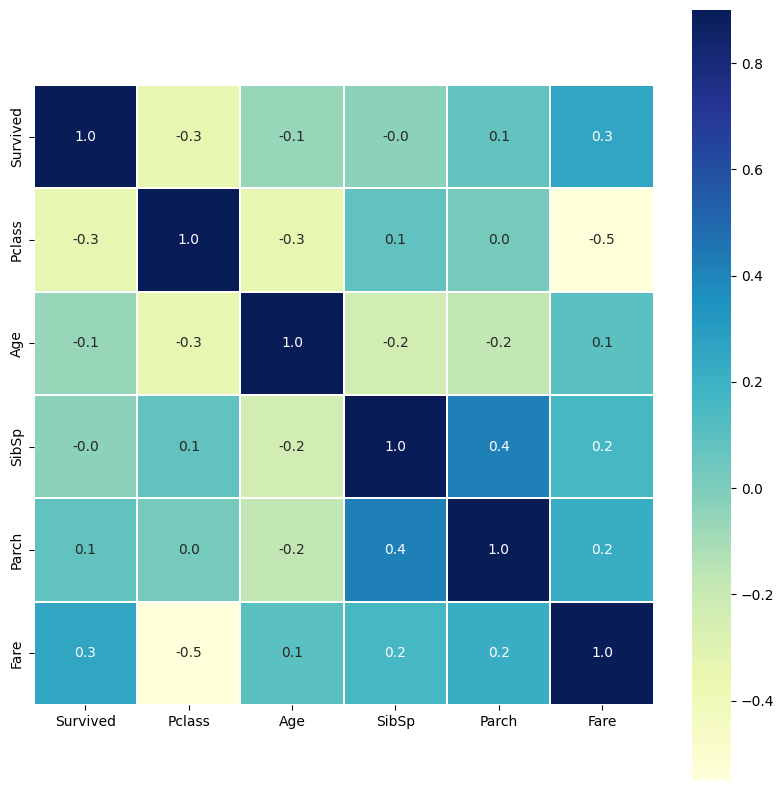

In [25]:
#Correlation Matrix

'''The correlation coefficient measures the linear relationship between a pair of variables, range [-1, 1].
1 indicates a full linear relationship, 0 no linear relationship, and -1 full negatively linear relationship.
It can be used for feature selection to remove redundant features.'''

corr_matrix = titanic_dataset_new[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
print(corr_matrix)

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmax=0.9, annot=True, square=True, linewidths=0.3, cmap="YlGnBu", fmt=".1f")

# *Feature Scaling*

Feature scaling is a necessary step for most machine learning methods in order to achieve good learning performance and a faster learning process.

There are two commonly used feature scaling methods:

1.   Scaling features to a defined range: e.g., min-max scaling
2.   Standardization: zero mean and unit variance

In [26]:
#Option 1: Scaling features to a defined range: e.g., min-max scaling

from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()

minmax_scale.fit(titanic_dataset_new[['Age']])
titanic_dataset_new['Age'] = minmax_scale.transform(titanic_dataset_new[['Age']])
titanic_dataset_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.271174,1,0,7.2500,S
1,1,1,female,0.472229,1,0,71.2833,C
2,1,3,female,0.321438,0,0,7.9250,S
3,1,1,female,0.434531,1,0,53.1000,S
4,0,3,male,0.434531,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,13.0000,S
887,1,1,female,0.233476,0,0,30.0000,S
888,0,3,female,0.346569,1,2,23.4500,S
889,1,1,male,0.321438,0,0,30.0000,C


In [27]:
#Option 2: Standardization scales a feature to a feature with 0 mean and 1 standard deviation.

from sklearn.preprocessing import StandardScaler
standard_scale = StandardScaler()

standard_scale.fit(titanic_dataset_new[['Fare']])
titanic_dataset_new['Fare'] = standard_scale.transform(titanic_dataset_new[['Fare']])
titanic_dataset_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.271174,1,0,-0.502445,S
1,1,1,female,0.472229,1,0,0.786845,C
2,1,3,female,0.321438,0,0,-0.488854,S
3,1,1,female,0.434531,1,0,0.420730,S
4,0,3,male,0.434531,0,0,-0.486337,S
...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,-0.386671,S
887,1,1,female,0.233476,0,0,-0.044381,S
888,0,3,female,0.346569,1,2,-0.176263,S
889,1,1,male,0.321438,0,0,-0.044381,C


# *Encoding Categorical Features*

Most machine learning methods take only numerical data, except decision tree based methods which can take numerical and categorical features directly. So we need to convert categories to numbers.

## *One Hot Encoding*

In [28]:
from sklearn.preprocessing import OneHotEncoder

titanic_dataset_for_encoding = titanic_dataset[['Pclass', 'Sex', 'Embarked']].dropna()
one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

one_hot_encoder.fit(titanic_dataset_for_encoding)
encoded_titanic_dataset = pd.DataFrame(one_hot_encoder.transform(titanic_dataset_for_encoding))
encoded_titanic_dataset.columns = np.concatenate(one_hot_encoder.categories_).ravel().tolist()
encoded_titanic_dataset.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,1,2,3,female,male,C,Q,S
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## *Effect Encoding*

A feature with N categories will produce N binary features after one hot encoding as above. One of the N binary features is perfectly collinear with the other N-1 features. This means there are only N-1 non-collinear binary features for a N-category feature. So we can drop one of the derived binary features as follows.

In [29]:
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
titanic_dataset_for_encoding = titanic_dataset[['Pclass', 'Sex', 'Embarked']].dropna()

In [30]:
one_hot_encoder.fit(titanic_dataset_for_encoding)
encoded_titanic_dataset = pd.DataFrame(one_hot_encoder.transform(titanic_dataset_for_encoding))
encoded_titanic_dataset.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4
0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0


In [31]:
encoded_titanic_dataset = pd.concat([encoded_titanic_dataset, titanic_dataset[['Age', 'SibSp',  'Parch', 'Fare']]], axis = 1 )
encoded_titanic_dataset.head(5)

,0,1,2,3,4,Age,SibSp,Parch,Fare
0,0.0,1.0,1.0,0.0,1.0,22.0,1,0,7.2500
1,0.0,0.0,0.0,0.0,0.0,38.0,1,0,71.2833
2,0.0,1.0,0.0,0.0,1.0,26.0,0,0,7.9250
3,0.0,0.0,0.0,0.0,1.0,35.0,1,0,53.1000
4,0.0,1.0,1.0,0.0,1.0,35.0,0,0,8.0500


# *First Machine Learning Project*

Building a k-nerest neighbours model to predict Suvival based on passengers' data

In [42]:
titanic = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_train.csv')

'''We ignore 'PassengerId', 'Name' and 'Ticket', as they are useless for machine learnign. We also ignore 'Cabin' as it contains too many missing values.'''

titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [43]:
#Splitting the data into input and output
titanic_x = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
titanic_y = titanic['Survived']

In [44]:
#Split the data into Train and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_x, titanic_y, test_size=0.3, random_state=42, stratify=titanic_y)